# Top Earners in the Movie Industry

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose the IMDB movie dataset. I've wanted to know how much the different movie genres, directors and production companies have grossed over a period of time.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('imdb-movies.csv')
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Cleaning

In [3]:
# Drop columns without neccesary information and remove all records with no financial information
df.drop(['id', 'imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [4]:
# df.isna().sum()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09


In [5]:
df.head(50)

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015,1.747999e+08,1.385749e+09
5,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015,1.241999e+08,4.903142e+08
6,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015,1.425999e+08,4.053551e+08
7,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015,9.935996e+07,5.477497e+08
8,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015,6.807997e+07,1.064192e+09
9,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015,1.609999e+08,7.854116e+08


#### Check datatypes

In [6]:
df.dtypes

budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### If I created one record for each the `production_companies` a movie was release under and one record each for `genres`<br>and tried to run calculations, it wouldn't work because for many records, the amount of `production_companies`<br>and `genres` aren't the same, so I'll create 2 dataframes; one w/o a `production_companies` column and one w/o a `genres` columns

#### One `production_companies` per record

In [14]:
df.columns

Index(['budget', 'revenue', 'original_title', 'cast', 'director', 'runtime',
       'genres', 'production_companies', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
# GENRES
# For every string of genres in that record, split the production companies into a list. 
# This way we should be able to query whichever production company

p_r = df[df.production_companies.str.contains('|')]
p_r.production_companies = p_r.production_companies.apply(lambda x:x.split('|'))

In [16]:
df_pc = pd.DataFrame(columns=df.columns)
for i in range(len(p_r)):
    record = p_r.iloc[i]
    for pc in p_r.production_companies[i]:
        df_pc = df_pc.append(pd.DataFrame([
            [record.budget, record.revenue, record.original_title, record.cast, record.director, record.runtime, record.genres, pc, record.release_year, record.budget_adj, record.revenue_adj]
        ], columns=df.columns))

In [ ]:
df_pc.drop('genres', axis=1, inplace=True)

In [21]:
df_pc.reset_index(drop=True, inplace=True)

In [22]:
df_pc.head(10)

,budget,revenue,original_title,cast,director,runtime,production_companies,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios,2015,1.379999e+08,1.392446e+09
1,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Amblin Entertainment,2015,1.379999e+08,1.392446e+09
2,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Legendary Pictures,2015,1.379999e+08,1.392446e+09
3,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Fuji Television Network,2015,1.379999e+08,1.392446e+09
4,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Dentsu,2015,1.379999e+08,1.392446e+09
5,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures,2015,1.379999e+08,3.481613e+08
6,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Kennedy Miller Productions,2015,1.379999e+08,3.481613e+08
7,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Summit Entertainment,2015,1.012000e+08,2.716190e+08
8,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Mandeville Films,2015,1.012000e+08,2.716190e+08
9,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Red Wagon Entertainment,2015,1.012000e+08,2.716190e+08


#### One `genres` per record

<a id='eda'></a>
## Exploratory Data Analysis

### Which production companies released the most movies in the last 10 years? Display the top 10 production companies.

In [47]:
df_pc_10 = df_pc.query('release_year > 2007').production_companies.value_counts().nlargest(10)
df_pc_10

Universal Pictures                        115
Warner Bros.                               96
Relativity Media                           96
Columbia Pictures                          82
Paramount Pictures                         73
Walt Disney Pictures                       60
BBC Films                                  58
Twentieth Century Fox Film Corporation     54
Lionsgate                                  52
Canal+                                     52
Name: production_companies, dtype: int64

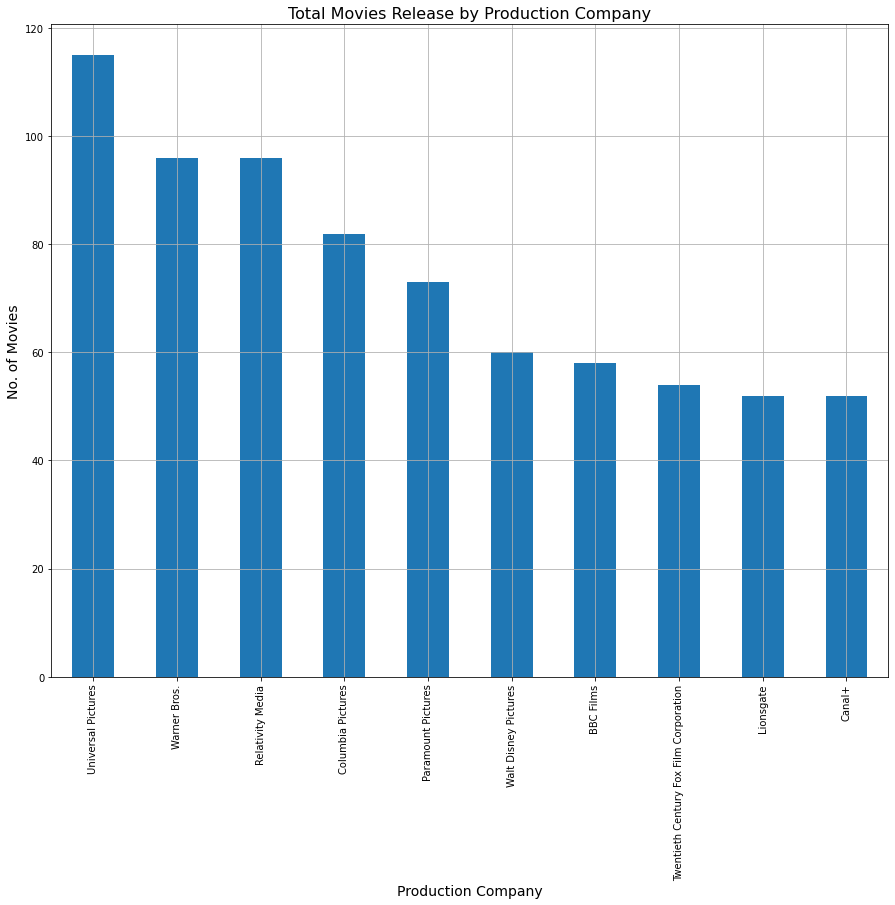

In [48]:
df_pc_10.plot(x=df_pc_10.index, y=df_pc_10, kind='bar', figsize=(15, 12), grid=True)
plt.title('Total Movies Release by Production Company', fontsize=16)
plt.ylabel('No. of Movies', fontsize=14)
plt.xlabel('Production Company', fontsize=14);

### What 5 movie genres grossed the highest all-time?

### Who are the top 10 grossing directors?

In [55]:
df_d_10 = df.groupby('director').revenue.sum().nlargest(10)/1e9
df_d_10

director
Steven Spielberg     9.018564
Peter Jackson        6.523245
James Cameron        5.841895
Michael Bay          4.917208
Christopher Nolan    4.167549
David Yates          4.154296
Robert Zemeckis      3.869691
Chris Columbus       3.851492
Tim Burton           3.665415
Ridley Scott         3.649996
Name: revenue, dtype: float64

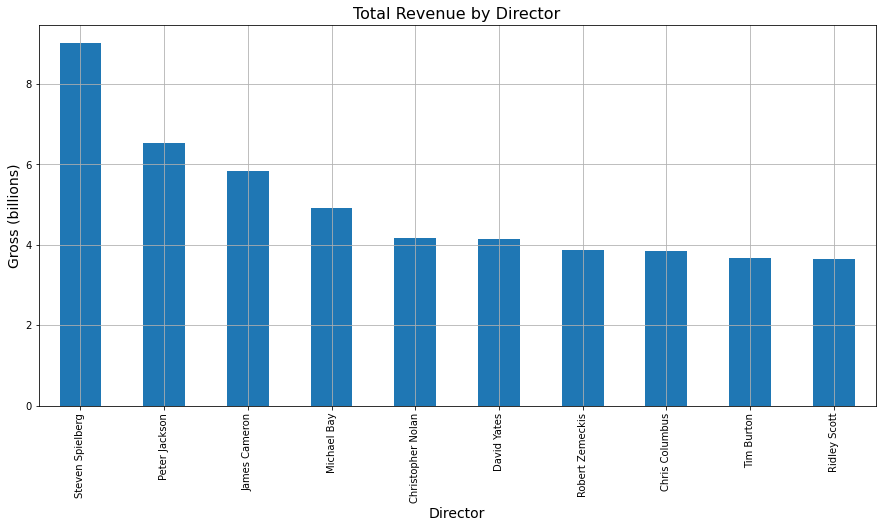

In [56]:
df_d_10.plot(x=df_d_10.index, y=df_d_10, kind='bar', figsize=(15, 7), grid=True, sort_columns=True)
plt.title('Total Revenue by Director', fontsize=16)
plt.ylabel('Gross (billions)', fontsize=14)
plt.xlabel('Director', fontsize=14);

### Compare the revenue of the highest grossing movies of all time.

In [65]:
# df[df.original_title.duplicated()]
mr = df.groupby('original_title').revenue.max().nlargest(10)/1e9
mr

original_title
Avatar                                          2.781506
Star Wars: The Force Awakens                    2.068178
Titanic                                         1.845034
The Avengers                                    1.519558
Jurassic World                                  1.513529
Furious 7                                       1.506249
Avengers: Age of Ultron                         1.405036
Harry Potter and the Deathly Hallows: Part 2    1.327818
Frozen                                          1.274219
Iron Man 3                                      1.215440
Name: revenue, dtype: float64

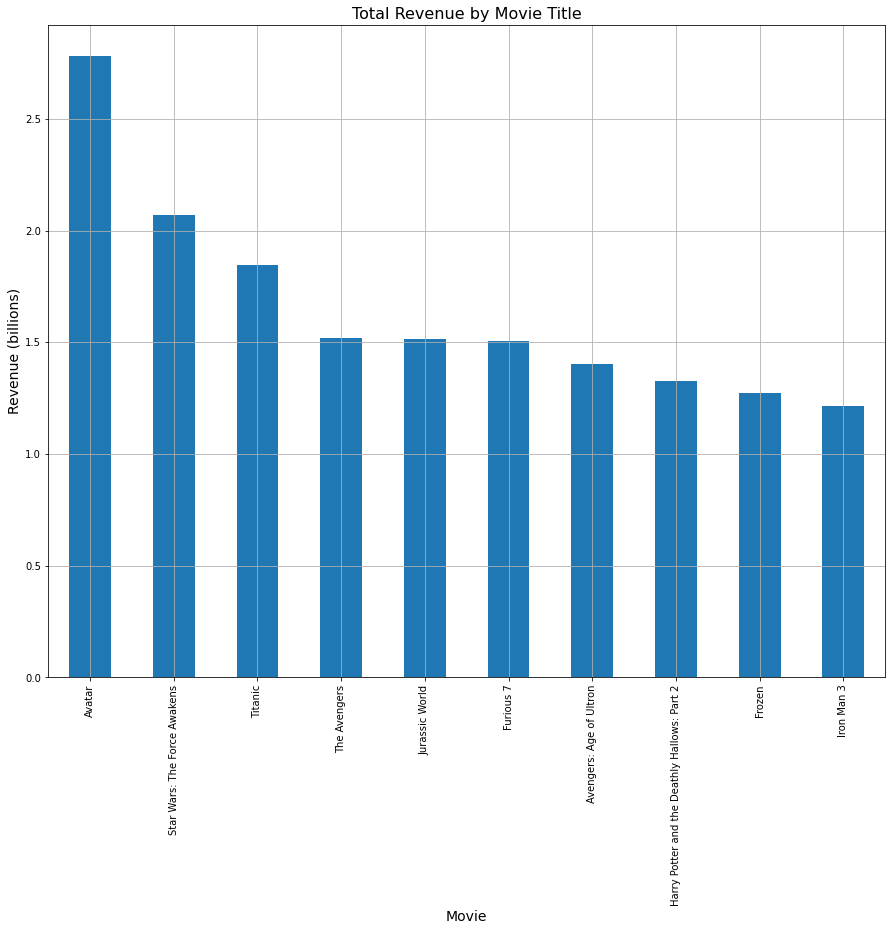

In [67]:
mr.plot(x=mr.index, y=mr, kind='bar', figsize=(15, 12), grid=True, sort_columns=True)
plt.title('Total Revenue by Movie Title', fontsize=16)
plt.ylabel('Revenue (billions)', fontsize=14)
plt.xlabel('Movie', fontsize=14);

<a id='conclusions'></a>
## Conclusions

* Avatar is the highest-grossing movie of all time.

* Steven Spielberg is the highest-grossing director of all time.

* Action movies (not to my surprise) are the highest-grossing movies..

* Disney is not one of the top 5 highest-grossing production companies during the last 10 years.